In [3]:
from selenium import webdriver as wd
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup as bs
from urllib import parse
import time, datetime, re, json, os
import pandas as pd
from metadata import *

keyword = input("검색어: ")
num = int(input("스크롤 횟수: "))


driver = wd.Chrome(driver_path)
print(f"login start - option {login_option}")
login_url = "https://www.instagram.com/accounts/login/"
driver.get(login_url)
time.sleep(5)

is_login_success = False
if login_option == "instagram":
    try:
        instagram_id_form = driver.find_element(By.XPATH, instagram_id_name)
        instagram_id_form.send_keys(user_id)
        time.sleep(3)

        instagram_pw_form = driver.find_element(By.XPATH, instagram_pw_name)
        instagram_pw_form.send_keys(user_pw)
        time.sleep(3)
        
        login_ok_button =  driver.find_element(By.XPATH, instagram_login_btn)
        login_ok_button.click()
        is_login_success = True
    except:
        print("instagram login fail")
        is_login_success = False
    time.sleep(10)


if is_login_success:
    print(f"login {login_option} success")
    print(f"Start {keyword} Extract")
    keyword = parse.quote(keyword)
    url = f"https://www.instagram.com/explore/tags/{keyword}/"
    driver.get(url)
    time.sleep(5)
    
    
    # 스크롤 다운
    before_location = driver.execute_script("return window.pageYOffset")
    scroll_location = driver.execute_script("return document.body.scrollHeight")
    while True:
        #현재 위치 + 지정 수 만큼 스크롤 이동
        driver.execute_script("window.scrollTo(0,{})".format(scroll_location + num))
            
        #전체 스크롤이 늘어날 때까지 대기
        time.sleep(2)
        
        #이동 후 스크롤 위치
        after_location = driver.execute_script("return window.pageYOffset")
        
        #이동후 위치와 이동 후 위치가 같으면(더 이상 스크롤이 늘어나지 않으면) 종료
        if before_location == after_location:
            break

        #같지 않으면 다음 조건 실행
        else:
            #이동여부 판단 기준이 되는 이전 위치 값 수정
            before_location = driver.execute_script("return window.pageYOffset")

    # 이미지
    html = driver.page_source
    soup = bs(html, 'html.parser')
    imgs = soup.find_all('img', class_="_aagt")
driver.close()

login start - option instagram
login instagram success
Start 네일아트 Extract


In [4]:
len(imgs)

63

In [5]:
imgs[0].attrs['src']

'https://scontent-ssn1-1.cdninstagram.com/v/t51.2885-15/290694333_1227345834667557_3776404095506755238_n.jpg?stp=dst-jpg_e35&_nc_ht=scontent-ssn1-1.cdninstagram.com&_nc_cat=109&_nc_ohc=v9rb3zWmwz8AX9RT4wc&edm=AGyKU4gBAAAA&ccb=7-5&ig_cache_key=Mjg3MDM1MTE2NzY3MTMxMTg4Nw%3D%3D.2-ccb7-5&oh=00_AT_tBDejBaON-VdULq8Z9VW_obKOX5egtO5IjVFSkZRyIA&oe=62C12CA7&_nc_sid=4cb768'

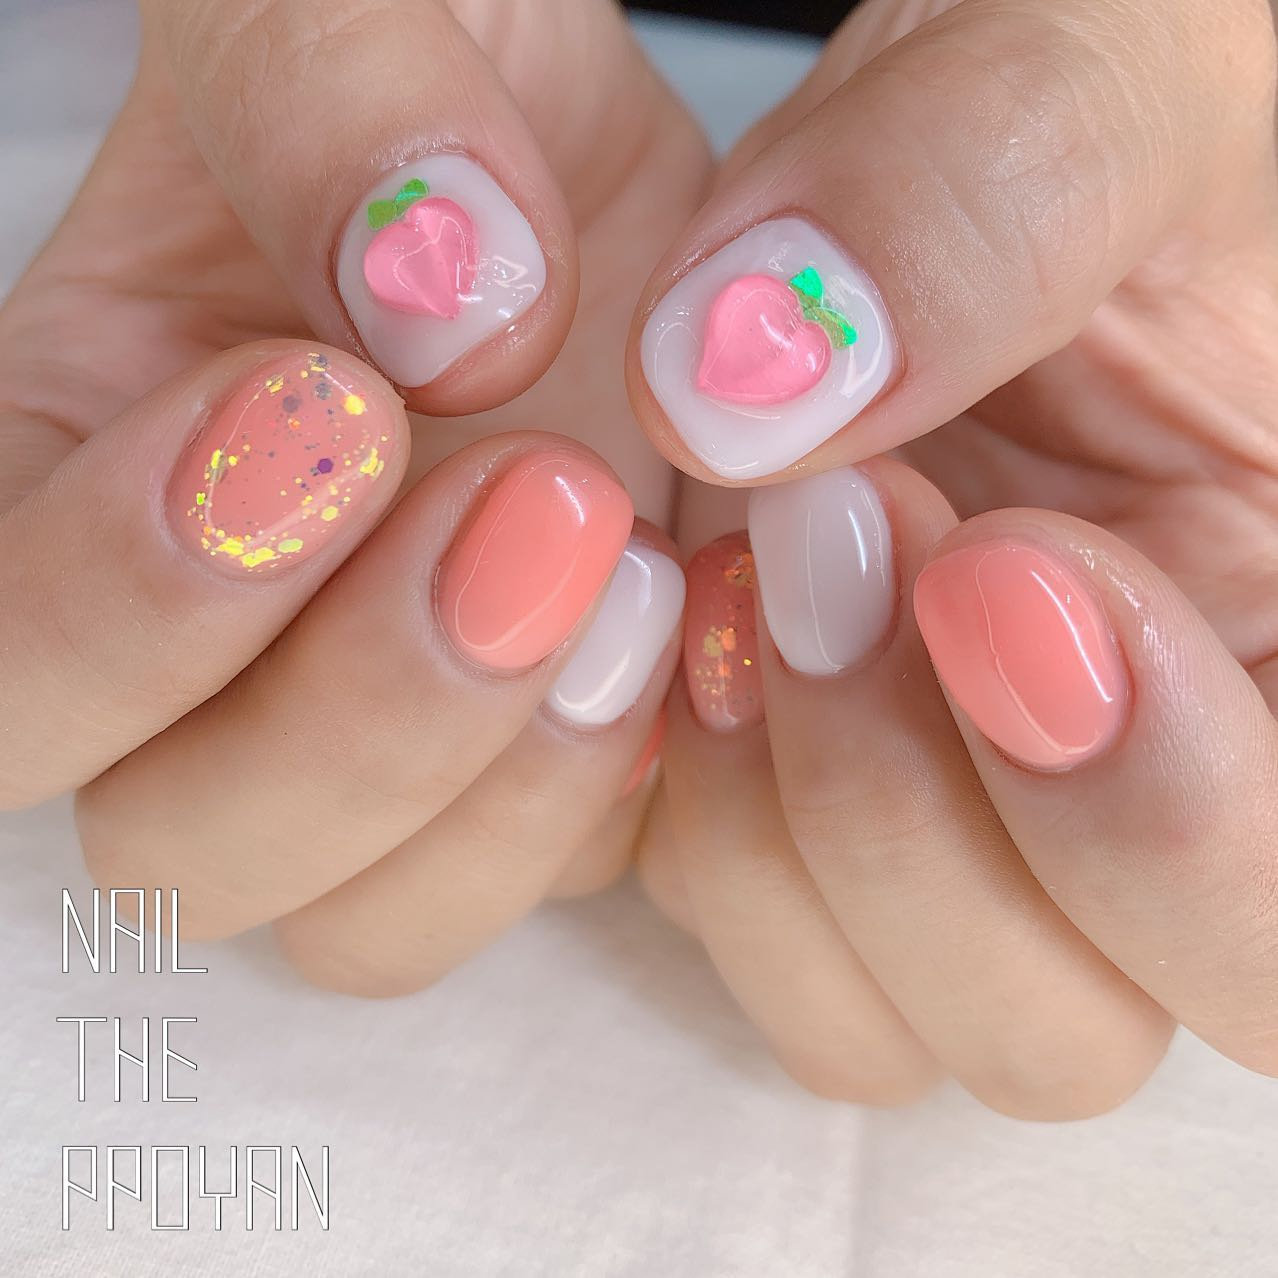

In [11]:
import urllib.request
from PIL import Image

url = imgs[0].attrs['src']
req = urllib.request.Request(url)
res = urllib.request.urlopen(req)
Image.open(res)